# 9.1 Handling Highly Correlated Variables
## 9.1.1 An Initial Linear Model of Online Spend

In [2]:
cust.df <- read.csv("./custdf-Ch4.csv")
summary(cust.df)

    cust.id            age         credit.score   email     distance.to.store 
 Min.   :   1.0   Min.   :19.34   Min.   :543.0   no :186   Min.   :  0.2136  
 1st Qu.: 250.8   1st Qu.:31.43   1st Qu.:691.7   yes:814   1st Qu.:  3.3383  
 Median : 500.5   Median :35.10   Median :725.5             Median :  7.1317  
 Mean   : 500.5   Mean   :34.92   Mean   :725.5             Mean   : 14.6553  
 3rd Qu.: 750.2   3rd Qu.:38.20   3rd Qu.:757.2             3rd Qu.: 16.6589  
 Max.   :1000.0   Max.   :51.86   Max.   :880.8             Max.   :267.0864  
                                                                              
 online.visits     online.trans      online.spend      store.trans    
 Min.   :  0.00   Min.   :  0.000   Min.   :   0.00   Min.   : 0.000  
 1st Qu.:  0.00   1st Qu.:  0.000   1st Qu.:   0.00   1st Qu.: 0.000  
 Median :  6.00   Median :  2.000   Median :  37.03   Median : 1.000  
 Mean   : 28.29   Mean   :  8.385   Mean   : 170.32   Mean   : 1.323  
 3rd Qu.: 31.

In [4]:
spend.m1 <- lm(online.spend ~ ., data=subset(cust.df[, -1], online.spend > 0))
summary(spend.m1) # large StdError for several variables


Call:
lm(formula = online.spend ~ ., data = subset(cust.df[, -1], online.spend > 
    0))

Residuals:
     Min       1Q   Median       3Q      Max 
-234.097   -8.828    0.519    9.956  227.238 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.718948  33.537665   0.200   0.8413    
age                0.422773   0.450825   0.938   0.3489    
credit.score      -0.033698   0.043977  -0.766   0.4440    
emailyes          -5.689283   5.806621  -0.980   0.3278    
distance.to.store -0.043548   0.100539  -0.433   0.6651    
online.visits     -0.072269   0.204061  -0.354   0.7234    
online.trans      20.610744   0.667450  30.880   <2e-16 ***
store.trans        0.135018   3.211943   0.042   0.9665    
store.spend        0.001796   0.078732   0.023   0.9818    
sat.service        5.638769   3.016181   1.870   0.0623 .  
sat.selection     -4.370606   2.909073  -1.502   0.1338    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Re

Loading required package: grid
Loading required package: lattice


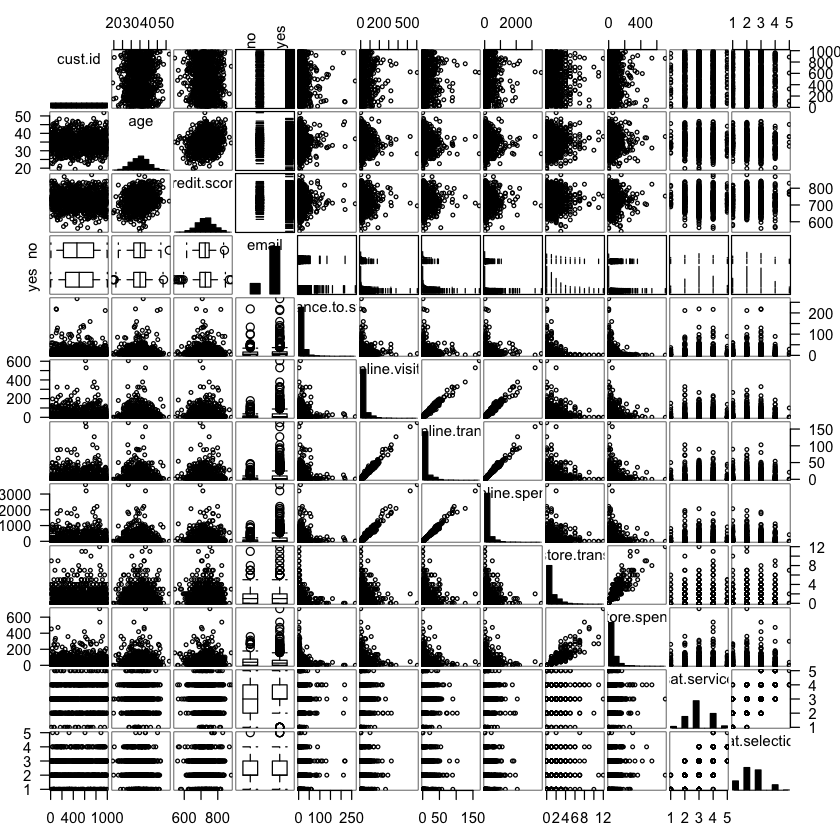

In [6]:
library(gpairs)
gpairs(cust.df)

In [7]:
autoTransform <- function(x){
    require(forecast)
    return(scale(BoxCox(x, BoxCox.lambda(x))))
}

In [9]:
cust.df.bc <- cust.df[complete.cases(cust.df), -1]
cust.df.bc <- subset(cust.df.bc, online.spend > 0)
numcols <- which(colnames(cust.df.bc) != "email")
cust.df.bc[, numcols] <- lapply(cust.df.bc[, numcols], autoTransform)

Loading required package: forecast
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”

ERROR: Error in BoxCox(x, BoxCox.lambda(x)):  関数 "BoxCox" を見つけることができませんでした 


In [ ]:
summary(cust.df.bc)
gpairs(cust.df.bc)

In [ ]:
spend.m2 <- lm(online.spend ~ ., data=cust.df.bc)
summary(spend.m2)

In [ ]:
spend.m3 <- lm(online.spend ~ online.trans, data=cust.df.bc)
anova(spend.m3, spend.m2)

## 9.1.1 Remediating Collinearity